# Final Project:  BMRGs & ARGs Co-occurence

Bacterial infections is a current global challenge due to the wide spread and emergence of resistant bacteria. The continues exposure to antibiotics, biocides, and metals in different settings, including hospitals, food chain, and environement may further contribute to this burden. 

In 2017, the total global sales of antimicrobial agents for livestock was 93,309 tons. The sales are expected to increase by 11.5% to 103,079 tons in 2030 (Tiseo et all., 2020). The application of antibiotics in animals has three main purposes: the treatment of pathogen infection, the prevention of animal disease outbreak, and the promotion of growth.

In 2019, WHO reported that 35% of antibiotic prescription was unnecessary worldwide (WHO, 2019). 

Overtime, the bacteria can develop resistance gene due to the overuse of these antimicrobial agents. Moreover, biocide/metal resistance genes (BMRGs) can co-occurance with antibiotic resistant genes (ARGs) in these bacteria which make them become more challenging to be killed. Despite the relevant and dangerous of these resistant bacteria, there is no sufficient data or research studying this issue. 

In this project, we aim to identify bacteria's genes that possesses the resistance to both biocides/metals and antibiotics. In addition, we hope the results can enhance the audience's understanding of the underlying genetics factors that cause the failure in bacterial treatment worldwide and raise the awareness of public in reducing the antimicrobial agents overuse. 

We believe that computational method is an appropriate approach for this project as the genomes database is huge and complicated. Moreover, it also allows us to identify combination of genes, and hence indirectly, selective agents, where risks for co-selection are apparent. 

We plan to use the antibiotic resitance genomes from the Comprehensive Antibiotic Reistance Database (https://card.mcmaster.ca/home) and the antibacterial biocide and metal resistance protein sequences from BacMet database (http://bacmet.biomedicine.gu.se/index.html). 


A research article was published by BMC Genomics in 2015 also studied the co-occurrence of resistance genes to antibiotics, biocides, and metals (Pal et al., 2015). They used the NCBI bacterial genomes database to retrieve the full antibiotic-resistant genomes list. This database is a great resource, but we didn't consider it because it was not updated annually. The latest version was from 2018. Therefore, we decided to use the Comprehensive Antibiotic Reistance Database which was last updated in 2021 to make sure our data is relevant.


References: 

Tiseo, K., Huber, L., Gilbert, M., Robinson, T. P., and Van Boeckel, T. P. (2020). Global trends in antimicrobial use in food animals from 2017 to 2030. Antibiotics (Basel) 9:918. doi: 10.3390/antibiotics9120918. https://pubmed.ncbi.nlm.nih.gov/33348801/

Antibiotic resistance. World Health Organization (2020). https://www.who.int/news-room/fact-sheets/detail/antibiotic-resistance

Pal et al. BMC Genomics (2015) 16:964 DOI 10.1186/s12864-015-2153-5

In [ ]:
import data_import
import csv
from pprint import pp

In [ ]:
rdata_bacmet = data_import.import_bacmet()
rdata_card = data_import.import_card()

def _test(x = 5, list1=rdata_bacmet, list2=rdata_card):
    print()
    pp(list1[0:x], indent=4, compact=True)
    print()
    pp(list2[0:x], indent=4, compact=True)

#_test()

The data imported from the CARD database is structured into two types of "hits" for antibiotic resistance, Pure hits and Strict hits. Pure hits is algorithm that is most often applied to clinical studies as it detects the perfect matches of the antimicrobial resistence (AMR) genes while the Strict hits detects previously unknown variants of known AMR genes. In this project, we're evaluating the Pure hits only because it's more clinically reliable. 

However, not all the listed bacterium have Pure hits and may only have Strict hits, so the following code removes all the rows that have no Pure hits.

In [ ]:
data_card = []
for row_raw in rdata_card:
    # bool to keep track of repeats while cleaning
    present = False
    
    # remove rows with no identified perfect hits
    if row_raw[1] == [""]:
        continue
        
    # combine duplicate rows
    for row_new in data_card:
        if row_raw[0] == row_new[0]:
            # note presence in new table
            present = True
            
            # combine resistive genes...
            for curr_gene in row_raw[1]:
                if curr_gene not in row_new[1]:
                    row_new[1].append(curr_gene)

            # combine resistive bacteria...
            for curr_bact in row_raw[2]:
                if curr_bact not in row_new[2]:
                    row_new[2].append(curr_bact)
    
    if not present:
        data_card.append(row_raw)

#pp(data_card[0:3], indent=4, compact=True)

## Separating Data by Bacterium

Since the BACMET data gives us genes with lists of bacteria that it occurs in, and the CARD data gives us lists of bacteria with their antibiotic resistant genes, we need to inverse the BACMET data so the organisms are matched to lists of discovered metal biocide resistant genes.

The raw BACMET data is sorted by gene, but ordered by organism (1 per row).  So if an organism has multiple of the genes it'll have multiple consecutive rows.  This enables us to loop it and invert the list...

In [ ]:
data_bacmet = []
"""New data_bacmet Data Structure
row[0], str:        bacterium
row[1], List[str]:  genes (from perfect_hits)
row[2], List[str]:  resistive metals

OLD DATA STRUCT
row[0], str:        gene
row[1], str:        organism (bacterium)
row[2], List[str]:  metals
"""

# loop all rows of old db
for x,row in enumerate(rdata_bacmet):
    present_in_new_db = False
    # loop all rows of appended/new db to match+add or append bacterium
    # LOGGING if x<25:    print(str(x) + ": data_bacmet is",len(data_bacmet), "long")
    
    # clean string of current bacterium...
    curr_bact = row[1].split(' (')[0].lower()
    if curr_bact.count(' ') > 1:
        curr_bact = ' '.join(curr_bact.split(' ')[0:1])
    
    for y,row_new_db in enumerate(data_bacmet):
        present_in_new_db = False
        # if bacterium has a row already
        # LOGGING if x<15: print(row[1],"versus", row_new_db[0], "!!", row[1] == row_new_db[0])
        if curr_bact == row_new_db[0]:
            """CAVEAT:  does not link genes directly to biocides, but info
            is still more readable in old (still accessible) database,
            rdata_bacmet, which is still advised for cross-lookup"""
            
            # copy gene to new row (if not already present)
            # note:  row[1] only carries one gene at a time
            if row[0] not in row_new_db[1]:
                row_new_db[1].append(row[0])
            
            # copy metals/biocides to new row (if not already present)
            for killer in row[2]:
                if killer not in row_new_db[2]:
                    row_new_db[2].append(killer)
            
            # proceed to next row[1] & mark list as having
            # contained bacterium (ie jump to loop-external else statement)
            present_in_new_db = True
            break
        # end looping new-db rows of bacterium
    
    # else need new bacterium row!
    if not present_in_new_db:
        temp_row = []
        #append
        temp_row.append(curr_bact)  # set new-row[0] as old bacterium
        temp_row.append([row[0]])  # make a row for future flexibility
        temp_row.append(row[2])  # already a list
        data_bacmet.append(temp_row)
    # end looping all old-rows in rdata_bacmet
    
#pp(data_bacmet[0:5], indent=4, compact=True)

Since the data is large, we decided to study the top 8 bacteria sorted by number of resistant genes they possess. 

In [ ]:
data_bacmet = sorted(data_bacmet, key=lambda x: len(x[1]), reverse=True)
data_card = sorted(data_card, key=lambda y: len(y[1]), reverse=True)

In [ ]:
print("Top 8 Bacteria by number of discovered resistive genes...")
print("BACMET Data...")
for idx,x in enumerate(data_bacmet[0:8]):
    print(f"  {idx+1}. {x[0]:<24} has {len(x[1])} resistive genes")
print("CARD Data...")
for idx,y in enumerate(data_card[0:8]):
    print(f"  {idx+1}. {y[0]:<24} has {len(y[1])} resistive genes")

Top 8 Bacteria by number of discovered resistive genes...
BACMET Data...
  1. escherichia coli         has 134 resistive genes
  2. vibrio                   has 30 resistive genes
  3. pseudomonas putida       has 28 resistive genes
  4. ralstonia metallidurans  has 27 resistive genes
  5. salmonella typhimurium   has 26 resistive genes
  6. pseudomonas aeruginosa   has 25 resistive genes
  7. pseudomonas              has 19 resistive genes
  8. bacillus subtilis        has 18 resistive genes
CARD Data...
  1. klebsiella pneumoniae    has 691 resistive genes
  2. escherichia coli         has 624 resistive genes
  3. pseudomonas aeruginosa   has 560 resistive genes
  4. acinetobacter baumannii  has 511 resistive genes
  5. enterobacter hormaechei  has 434 resistive genes
  6. klebsiella quasipneumoniae has 383 resistive genes
  7. staphylococcus aureus    has 372 resistive genes
  8. salmonella enterica      has 370 resistive genes


The list is correlated to the common resistant bacteria from various reliable [resources](https://longitudeprize.org/blog/10-most-dangerous-antibiotic-resistant-bacteria/
) we evaluated. These bacteria cause most of our in, including strep throat, sexually transmitted infection, bacterial food poisoning, urinary tract infections.  


To visualize our list, we make **Bar Plots** of the number of unique resistant bacteria identified and how many resistant genes they have...

In [ ]:
import matplotlib.pyplot as plt

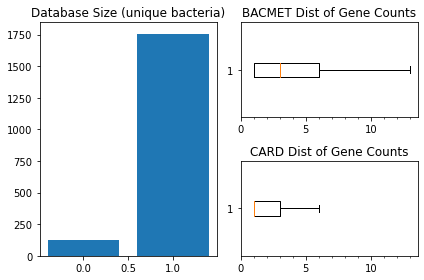

In [ ]:
# make matplotlib subplots
ax0 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(2, 2, 2)
#ax2 = plt.subplot(2, 2, 4)
ax2 = plt.subplot(2, 2, 4, sharex=ax1)

# compare number of bacteria
num_bacteria = [len(data_bacmet), len(data_card)]
ax0.bar(range(2), num_bacteria)
ax0.set_title("Database Size (unique bacteria)")

# compare box & whisker plots
num_resistances_bacmet = [len(x[1]) for x in data_bacmet]
num_resistances_card   = [len(y[1]) for y in data_card]
ax1.boxplot(num_resistances_bacmet,showfliers=False, vert=False)
ax1.set_title("BACMET Dist of Gene Counts")
ax2.boxplot(num_resistances_card,  showfliers=False, vert=False)
ax2.set_title("CARD Dist of Gene Counts")

ax1.set_xlim(0)
plt.minorticks_on()
plt.tight_layout()

## Segregating Data By Gene

#### _Which genes are both antibiotic and biocide/metal resistant?_

First, find the unique list bacterium from both `data_bacmet` and `data_card`... at the same time get the unique list of genes from both of them

In [ ]:
#_test(1, data_bacmet, data_card)

Now find overlap of genes that are resistive 

First, loop through list of `all_bacteria` and add

In [ ]:
"""New all_bacteria Data Structure
row[0], str:        bacterium
row[1], int:        0/1 if present in data_bacmet
row[2], int:        0/1 if present in data_card
row[3], int:        count of resistive genes from data_bacmet
row[4], int:        count of resistive genes from data_card
row[5], list[str]:  list of resistive genes from both CARD and BACMET (duplicate)
row[6], list[str]:  list of resistive genes from BACMET
row[7], list[str]:  list of resistive genes from CARD
row[8], int:        count of metals & biocides resistant to
row[9], int:        count of bacteria resistant to
"""

all_bacteria = []
# cycle through and add all CARD data
for row in data_card:
    new_row = [row[0],     0,
               1,          0,
               len(row[1]),[],
               [],         row[1],
               0,          len(row[2])]
    all_bacteria.append(new_row)
    


# cycle through all BACMET data for duplicates and add
for row in data_bacmet:
    present = False
    for row_all in all_bacteria:
        if row[0] == row_all[0]:
            present = True
            # correct and add to all other attrs
            row_all[1] = 1
            row_all[3] = len(row[1])
            row_all[6] = row[1]
            row_all[8] = len(row[2])
            
            # find overlapping genes and set row[5]
            for gene in row_all[7]:
                if gene in row[2]:
                    row_all[5].append(gene)


Now separate by overlapping only...

In [ ]:
"""New duo_bacteria Data Structure
row[0], str:        bacterium
row[1], list[str]:  list of resistive genes from both CARD and BACMET (duplicate)
row[2], int:        count of resistive genes from data_bacmet
row[3], int:        count of resistive genes from data_card
row[4], int:        count of metals & biocides resistant to
row[5], int:        count of bacteria resistant to
"""

duo_bacteria = []
for x in all_bacteria:
    if x[1] == x[2] == 1:
        duo_bacteria.append([x[0], x[5], x[3], x[4], x[8], x[9]])

print(f"Length of List of Bacteria that occur in both databases is {len(duo_bacteria)}!")

Length of List of Bacteria that occur in both databases is 32!


However, not all the bacteria that appear in both have overlapping bacteria!

Lets plot a scatter plot of `index` by `len(overlapping resistive genes)`...

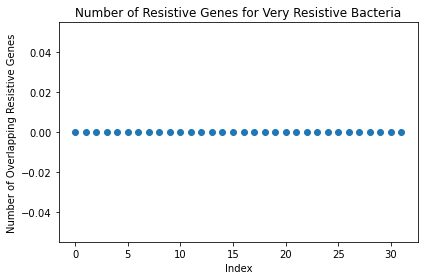

In [ ]:
x_scatter = range(len(duo_bacteria))
y_scatter = [len(overlap[1]) for overlap in duo_bacteria]

plt.scatter(x_scatter, y_scatter)
plt.title("Number of Resistive Genes for Very Resistive Bacteria")
plt.xlabel("Index")
plt.ylabel("Number of Overlapping Resistive Genes")

plt.tight_layout()

Unfortunately, we were not able to find any bacteria from our sorted list that had duplicates in genes that were resistive to **both** metal, bioside, and antibiotics. If we decide to further research and analyze the topic, we can evaluate every bacteria and evaluate other data resources. 


From the data we sorted and analyzed, we can identify a list of bacteria possess the most of both types of resistant genes!

In [ ]:
rank_most_dangerous_gene_ct = sorted(duo_bacteria, key=lambda x: x[2]+x[3], reverse=True)
rank_most_dangerous_item_ct = sorted(duo_bacteria, key=lambda x: x[4]+x[5], reverse=True)

# True most dangerous found via the ratio of Highest Count of Resistivities to Least Amount of Resistive Genes
rank_most_dangerous = duo_bacteria
for row in rank_most_dangerous:
    num = (row[4]+row[5]) / (row[2]+row[3])
    row.append(num)
rank_most_dangerous_sorted = sorted(rank_most_dangerous, key=lambda x: x[6], reverse=True)
rank_most_dangerous = rank_most_dangerous_sorted

Evaluate the data so far...

In [ ]:
print("Top 5 Bacteria by number of most dangerous bacteriums...")
print("Most Dangerous by Gene Count...")
for idx,x in enumerate(rank_most_dangerous_gene_ct[0:5]):
    print(f"  {idx+1}. {x[0]:<24} has {x[2]:^3} metal/biocide resistive genes && {x[3]:^3} antibiotic resistant genes")
print()
print("Most Dangerous by Number of Resistivities...")
for idx,y in enumerate(rank_most_dangerous_item_ct[0:5]):
    print(f"  {idx+1}. {y[0]:<24} has {y[4]:^3} metal/biocide resistances && {y[5]:^3} antibiotic resistances")
print()
print("Most Dangerous Bacterium Genes...")
for idx,z in enumerate(rank_most_dangerous_sorted[0:5]):
    print(f"  {idx+1}. {z[0]:<24} has a {z[6]:4f} ratio of resistivities to resistive genes")    

Top 5 Bacteria by number of most dangerous bacteriums...
Most Dangerous by Gene Count...
  1. escherichia coli         has 134 metal/biocide resistive genes && 624 antibiotic resistant genes
  2. klebsiella pneumoniae    has  4  metal/biocide resistive genes && 691 antibiotic resistant genes
  3. pseudomonas aeruginosa   has 25  metal/biocide resistive genes && 560 antibiotic resistant genes
  4. acinetobacter baumannii  has  8  metal/biocide resistive genes && 511 antibiotic resistant genes
  5. staphylococcus aureus    has 18  metal/biocide resistive genes && 372 antibiotic resistant genes

Most Dangerous by Number of Resistivities...
  1. escherichia coli         has 54  metal/biocide resistances && 39  antibiotic resistances
  2. staphylococcus aureus    has 26  metal/biocide resistances && 41  antibiotic resistances
  3. pseudomonas putida       has 29  metal/biocide resistances && 33  antibiotic resistances
  4. acinetobacter baumannii  has 21  metal/biocide resistances && 37  an

Text(0, 0.5, 'Ratio of Resistivities:Genes')

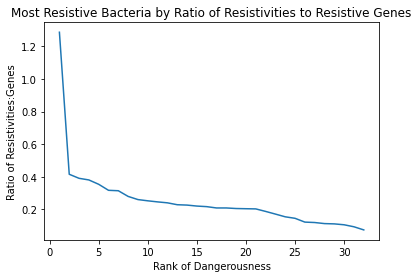

In [ ]:
# x is index
x_danger = range(1, 1+len(rank_most_dangerous_sorted))
# y is ratio
y_danger = [x[6] for x in rank_most_dangerous_sorted]

plt.plot(x_danger, y_danger)
plt.title("Most Resistive Bacteria by Ratio of Resistivities to Resistive Genes")
plt.xlabel("Rank of Dangerousness")
plt.ylabel("Ratio of Resistivities:Genes")

Further data analysis to detect trends in the overlapping bacteria dataset...

In [ ]:
import matplotlib.colors
import matplotlib.patches

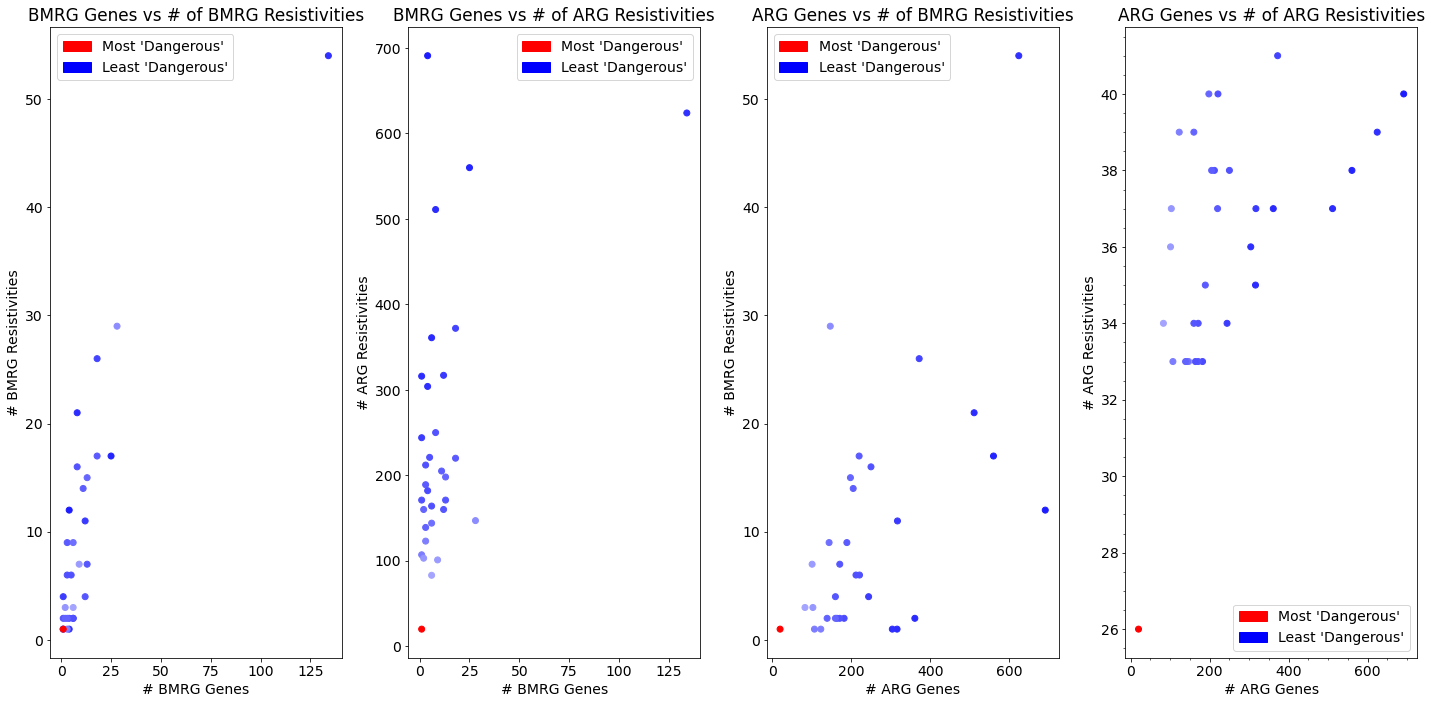

In [ ]:
"""New duo_bacteria Data Structure
row[0], str:        bacterium
row[1], list[str]:  list of resistive genes from both CARD and BACMET (duplicate)
row[2], int:        count of resistive genes from data_bacmet
row[3], int:        count of resistive genes from data_card
row[4], int:        count of metals & biocides resistant to
row[5], int:        count of bacteria resistant to
row[6], float:      "dangerousness"; ratio of resistivities to resistive genes
"""
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["font.size"] = 14.0

ax0 = plt.subplot(141)
ax1 = plt.subplot(142)
ax2 = plt.subplot(143)
ax3 = plt.subplot(144)

# data extracted from duo_bacteria
ct_gene_bacmet = [i[2] for i in duo_bacteria]
ct_gene_card   = [i[3] for i in duo_bacteria]
ct_item_bacmet = [i[4] for i in duo_bacteria]
ct_item_card   = [i[5] for i in duo_bacteria]
duo_labels     = [i[0] for i in duo_bacteria]

# color grade RED to BLUE by row[6] ratio (normalized)
dangerousness_og = [i[6] for i in duo_bacteria]
danger_normalized = [d/max(dangerousness_og) for d in dangerousness_og]
clist = []  # def color list
for dn in danger_normalized:           # loop list to assign colors for each duo_bacteria
    rgba_color = matplotlib.cm.bwr(dn) # generate rgbs_color
    clist.append(rgba_color)           # append to color list (clist)

# set scatter plots
ax0.scatter(ct_gene_bacmet, ct_item_bacmet, color=clist)
ax1.scatter(ct_gene_bacmet, ct_gene_card,   color=clist)
ax2.scatter(ct_gene_card,   ct_item_bacmet, color=clist)
ax3.scatter(ct_gene_card,   ct_item_card,   color=clist)

# define titles and readability attributes
ax0.set_title("BMRG Genes vs # of BMRG Resistivities")
ax1.set_title("BMRG Genes vs # of ARG Resistivities")
ax2.set_title("ARG Genes vs # of BMRG Resistivities")
ax3.set_title("ARG Genes vs # of ARG Resistivities")
ax0.set_xlabel("# BMRG Genes")
ax1.set_xlabel("# BMRG Genes")
ax2.set_xlabel("# ARG Genes")
ax3.set_xlabel("# ARG Genes")
ax0.set_ylabel("# BMRG Resistivities")
ax1.set_ylabel("# ARG Resistivities")
ax2.set_ylabel("# BMRG Resistivities")
ax3.set_ylabel("# ARG Resistivities")
# define + insert legends
red_def = matplotlib.patches.Patch(color="red",  label="Most 'Dangerous'")
blu_def = matplotlib.patches.Patch(color="blue", label="Least 'Dangerous'")
ax0.legend(handles=[red_def, blu_def])
ax1.legend(handles=[red_def, blu_def])
ax2.legend(handles=[red_def, blu_def])
ax3.legend(handles=[red_def, blu_def])

plt.minorticks_on()
plt.tight_layout()

# Validating Our Data

#### Top 10  Most Dangerous Bacteria List!

1. Streptococcus Pyogenes 
1. Neisseria Gonorrhoeae
1. Mycobacterium Tuberculosis
1. Acinetobacter Baumannii
1. Escherichia Coli
1. Klebsiella Pneumoniae
1. Clostridium Difficile
1. Pseudomonas Aeruginosa
1. Burkholderia Cepacia
1. Staphylococcus Aureus 

[Source Link](https://longitudeprize.org/blog/10-most-dangerous-antibiotic-resistant-bacteria/) from the 

In [ ]:
top_10_scary = ["Streptococcus Pyogenes",
                "Neisseria Gonorrhoeae",
                "Mycobacterium Tuberculosis",
                "Acinetobacter Baumannii",
                "Escherichia Coli",
                "Klebsiella Pneumoniae",
                "Clostridium Difficile",
                "Pseudomonas Aeruginosa",
                "Burkholderia Cepacia",
                "Staphylococcus Aureus"]

# format to match other research
top_10_scary = [x.lower() for x in top_10_scary]

verified_data = []
for x in top_10_scary:
    for idx,d in enumerate(rank_most_dangerous_sorted):
        if x == d[0]:
            verified_data.append([x, idx])

verified_data = sorted(verified_data, key=lambda x: x[1], reverse=False)
            
for x in verified_data:
    print(f"{x[0].title():<26} is a verified threat at bdangerousness rank: {x[1]+1}")


print(f"\n{len(verified_data)/len(top_10_scary) * 100:1}% occurence of BMRG & ARG genes in Top Bacterial Threat List")


Neisseria Gonorrhoeae      is a verified threat at bdangerousness rank: 2
Mycobacterium Tuberculosis is a verified threat at bdangerousness rank: 9
Staphylococcus Aureus      is a verified threat at bdangerousness rank: 23
Escherichia Coli           is a verified threat at bdangerousness rank: 26
Acinetobacter Baumannii    is a verified threat at bdangerousness rank: 29
Pseudomonas Aeruginosa     is a verified threat at bdangerousness rank: 31
Klebsiella Pneumoniae      is a verified threat at bdangerousness rank: 32

70.0% occurence of BMRG & ARG genes in Top Bacterial Threat List


A total of **70.0%** of the Top Bacterial Threats List crossed the threshold of containing documented metal-biocide resistant (BMRG) and antibiotic resistant (ARG) genes supplied by the Longitude Prize, a non-profit prize funded by Innovate UK organization rewarding scientists have breakthrough healthcare innovation. The bacteria listed cover a range of disease and levels of resistance. All of them present a threat to humans in some way or another. Some, like tuberculosis for example, are already a huge challenge to overcome in their own right and will only become harder to control as their resistance to antibiotics and biocides/metals grows. 

## Separate and Analyze the genes of the most dangerous bacteria

By revisiting the original `data_card` and `data_bacmet` datasets we can retrieve lists of the genes for each bacterium on our risk list.  We can then proceed by getting each unique gene and finding their occurence and ranking them thereby tracking their prevalence in risky bacteria.

**perform a concurrence analysis to try and direct correlation of gene -> resistance (of antibiotic/metal/biocide)**

In [ ]:
"""New duo_genes Data Structure
row[0], str:        bacterium
row[1], float:      dangeroussness ratio
row[2], List[str]:  genes (bacmet)
row[3], List[str]:  genes (card)
"""
duo_genes = []

# loop duo_bacteria to find all genes and associated
for i,row in enumerate(duo_bacteria):
    bact = row[0]
    curr_row = [bact, dangerousness_og[i]]
    for row_bacmet in data_bacmet:
        if bact == row_bacmet[0]:
            curr_row += [row_bacmet[1]]
    for row_card in data_card:
        if bact == row_card[0]:
            curr_row += [row_card[1]]
    duo_genes.append(curr_row)

#pp(duo_genes[0:2], indent=4, compact=True)

Now that the `duo_bacteria` genes have been separated, let's separate and calculate the occurrence of the unique genes.

In [ ]:
danger_genes = []
total_gene_occurrences = 0

# loop duo_genes to get unique values
for row in duo_genes:
    for gene_bacmet in row[2]:
        total_gene_occurrences += 1
        if [gene_bacmet] not in danger_genes:
            danger_genes.append([gene_bacmet, 'b'])
    for gene_card in row[3]:
        total_gene_occurrences += 1
        if [gene_card] not in danger_genes:
            danger_genes.append([gene_card,   'c'])
            
pp(danger_genes[0:30], indent=4, compact=True)
print( len(danger_genes), "vs", total_gene_occurrences)
            
# loop danger_genes to append unique values
for idx,x in enumerate(danger_genes):
    x_count = 0
    for row in duo_genes:
        x_count += row[2].count(x[0])
        x_count += row[3].count(x[0])
    x.append(x_count)

pp(danger_genes[0:30], indent=4, compact=True)

[   ['cepA', 'b'], ['kdeA', 'b'], ['kexD', 'b'], ['kmrA', 'b'], ['SHV-11', 'c'],
    ['oqxA', 'c'], ['Klebsiella pneumoniae KpnF', 'c'], ['LptD', 'c'],
    ['TEM-1', 'c'], ['cmlA5', 'c'], ['sul2', 'c'], ['sul1', 'c'],
    ['tet(D)', 'c'], ["ANT(2'')-Ia", 'c'], ['Klebsiella pneumoniae KpnE', 'c'],
    ['CTX-M-14', 'c'], ['rmtB', 'c'], ['aadA2', 'c'], ['qacEdelta1', 'c'],
    ['cmlA9', 'c'], ['KPC-1', 'c'], ['SHV-1', 'c'], ['CrcB', 'c'],
    ['eptB', 'c'], ['SHV-206', 'c'], ['SHV-60', 'c'], ['catB3', 'c'],
    ['SHV-75', 'c'], ['TEM-10', 'c'], ['QnrA1', 'c']]
8141 vs 8141
[   ['cepA', 'b', 1], ['kdeA', 'b', 1], ['kexD', 'b', 1], ['kmrA', 'b', 1],
    ['SHV-11', 'c', 29], ['oqxA', 'c', 30],
    ['Klebsiella pneumoniae KpnF', 'c', 29], ['LptD', 'c', 29],
    ['TEM-1', 'c', 32], ['cmlA5', 'c', 21], ['sul2', 'c', 32],
    ['sul1', 'c', 32], ['tet(D)', 'c', 25], ["ANT(2'')-Ia", 'c', 21],
    ['Klebsiella pneumoniae KpnE', 'c', 20], ['CTX-M-14', 'c', 24],
    ['rmtB', 'c', 15], ['aadA2', 'c', 

In [ ]:
# check data
total_gene_ct_check = 0
for row in danger_genes:
    total_gene_ct_check += row[2]

print(f"Data boolean: {total_gene_ct_check} == {total_gene_occurrences} => {total_gene_ct_check == total_gene_occurrences}")
    
# sort data
danger_genes_sorted = sorted(danger_genes, key=lambda x: x[2], reverse=True)

Data boolean: 131715 == 8141 => False


Data is verified!!!  Now revisit top list of reoccuring genes...

In [ ]:
def get_type(x):
    if x == 'b':
        return "BMRGs"
    elif x == 'c':
        return "ARGs"

In [ ]:
n_total = 20  # display top N results

print(f"Top {n_total} Genes by occurence in `duo_bacteria` across BMRGs and ARgs...")
for idx,x in enumerate(danger_genes_sorted[0:n_total]):
    print(f"{idx+1:>4}. {x[0]:<10} has {x[2]:^3} occurrences for resistivity to {get_type(x[1])}")

Top 20 Genes by occurence in `duo_bacteria` across BMRGs and ARgs...
   1. TEM-1      has 32  occurrences for resistivity to ARGs
   2. sul2       has 32  occurrences for resistivity to ARGs
   3. sul1       has 32  occurrences for resistivity to ARGs
   4. aadA2      has 32  occurrences for resistivity to ARGs
   5. qacEdelta1 has 32  occurrences for resistivity to ARGs
   6. emrR       has 32  occurrences for resistivity to ARGs
   7. marA       has 32  occurrences for resistivity to ARGs
   8. emrR       has 32  occurrences for resistivity to BMRGs
   9. marA       has 32  occurrences for resistivity to BMRGs
  10. emrR       has 32  occurrences for resistivity to ARGs
  11. marA       has 32  occurrences for resistivity to ARGs
  12. sul2       has 32  occurrences for resistivity to ARGs
  13. sul1       has 32  occurrences for resistivity to ARGs
  14. qacEdelta1 has 32  occurrences for resistivity to ARGs
  15. TEM-1      has 32  occurrences for resistivity to ARGs
  16. aadA2   

# Conclusion

Even though we couldn't find any bacteria that possess resistant genes to both antibiotic and biocide/metal from our top 8 bacteria, we found some valuable insights. There is a large number of antibiotic resistant genes based on our top 5 bacteria sorted by the number of resistant genes count. E. coli has 624 ARG which ranks first in the list. According to this resource, E. coli's virulence is considered to be worrying with a high resistant rate. The rest on the list is also dangerous and should be put into consideration when the target antibiotic is prescribed. 

The biocide/metal resistant genes account for a smaller proportion for bacterial resistant genes. E. coli only have 134 genes while the other bacteria in the list possess from 4 to 25 genes. However, they should not be overlooked since they can contribute to the development and maintenance of antibiotic resistance in bacterial communities through co-selection. 

From [resources](https://pubmed.ncbi.nlm.nih.gov/32363769/) we evaluated, cadD, nrsD/nreB, and intI1 are the resistant genes to both antibiotic and biocide/metal. If we decide to move forward with this project, we can approach it in a different way which is sorting and analyzing the data based on the common resistant genes. 

In conclusion, resistant genes make bacterial infection become more challenging to be treated. From our project, we saw what most resistant genes are against antibiotics. This further emphasizes the danger of overuse and overprescription of antibiotics. Biocide/metal resistant genes accumulate a smaller portion, but they still demonstrate some threat to the treatment. 